# Projet de Pr√©diction des AVC dans un √âtablissement de Sant√©

## Contexte
Un √©tablissement de sant√© de premier plan a constat√© une augmentation du nombre de patients diagnostiqu√©s avec un AVC. Pour rem√©dier √† ce probl√®me croissant, l'√©tablissement a d√©cid√© de lancer un projet visant √† pr√©dire la probabilit√© qu'un patient soit victime d'un AVC en fonction de divers facteurs de sant√©.

## Objectif du Projet
L'objectif principal de ce projet est de cr√©er un mod√®le pr√©dictif capable de d√©terminer la probabilit√© qu'un patient soit victime d'un AVC en utilisant les ant√©c√©dents m√©dicaux et les informations d√©mographiques des patients. Ce mod√®le aidera √† identifier les patients √† risque √©lev√© et √† proposer des mesures d'intervention et de pr√©vention pr√©coces.

De mani√®re sp√©cifique il s'agit de:

1. Explorer l‚Äôensemble de donn√©es pour identifier les caract√©ristiques les plus importantes des patients et/ou les caract√©ristiques cliniques.
2. Construire un mod√®le de pr√©diction d‚Äôaccident vasculaire c√©r√©bral bien valid√© pour une utilisation clinique.
3. D√©ployer le mod√®le pour am√©liorer la prise de d√©cision clinique de l'organisation.

## Donn√©es Disponibles
L'√©tablissement de sant√© a acc√®s √† une grande quantit√© de donn√©es sur les patients, incluant :
- Ant√©c√©dents m√©dicaux
- Informations d√©mographiques

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_csv("D:/Perso/Detection_AVC/data/healthcare-dataset-stroke-data.csv")
data.head()

#data["smoking_status"]

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

## 1- Analyse Exploratoire des Donn√©es

#### 1-1 Analyse de Forme
-  **Variable cible** : stroke
-  **Nombre de ligne et de colonne**: 5110 et 11
-  **Type de variable**: qualitatives : 5 et quantitatives: 6
-  **Analyse des valeurs manquantes**: seule la variable 'Indice de masse corporelle (BMI) du patient' possede des valeurs manquantes (3.93%)



In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df=data.copy()
df=df.drop(columns="id",axis=0)
print(df.shape)

(5110, 11)


<Axes: ylabel='count'>

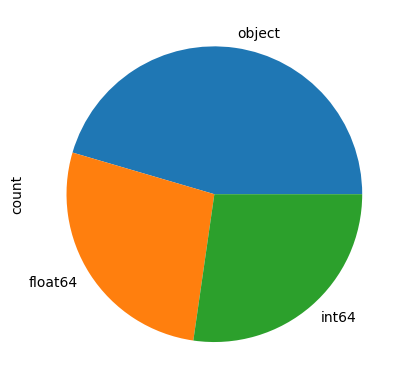

In [9]:
df.dtypes.value_counts().plot.pie()

In [10]:
#df["smoking_status"]=df["smoking_status"].replace('Unknown', np.nan)

<Axes: >

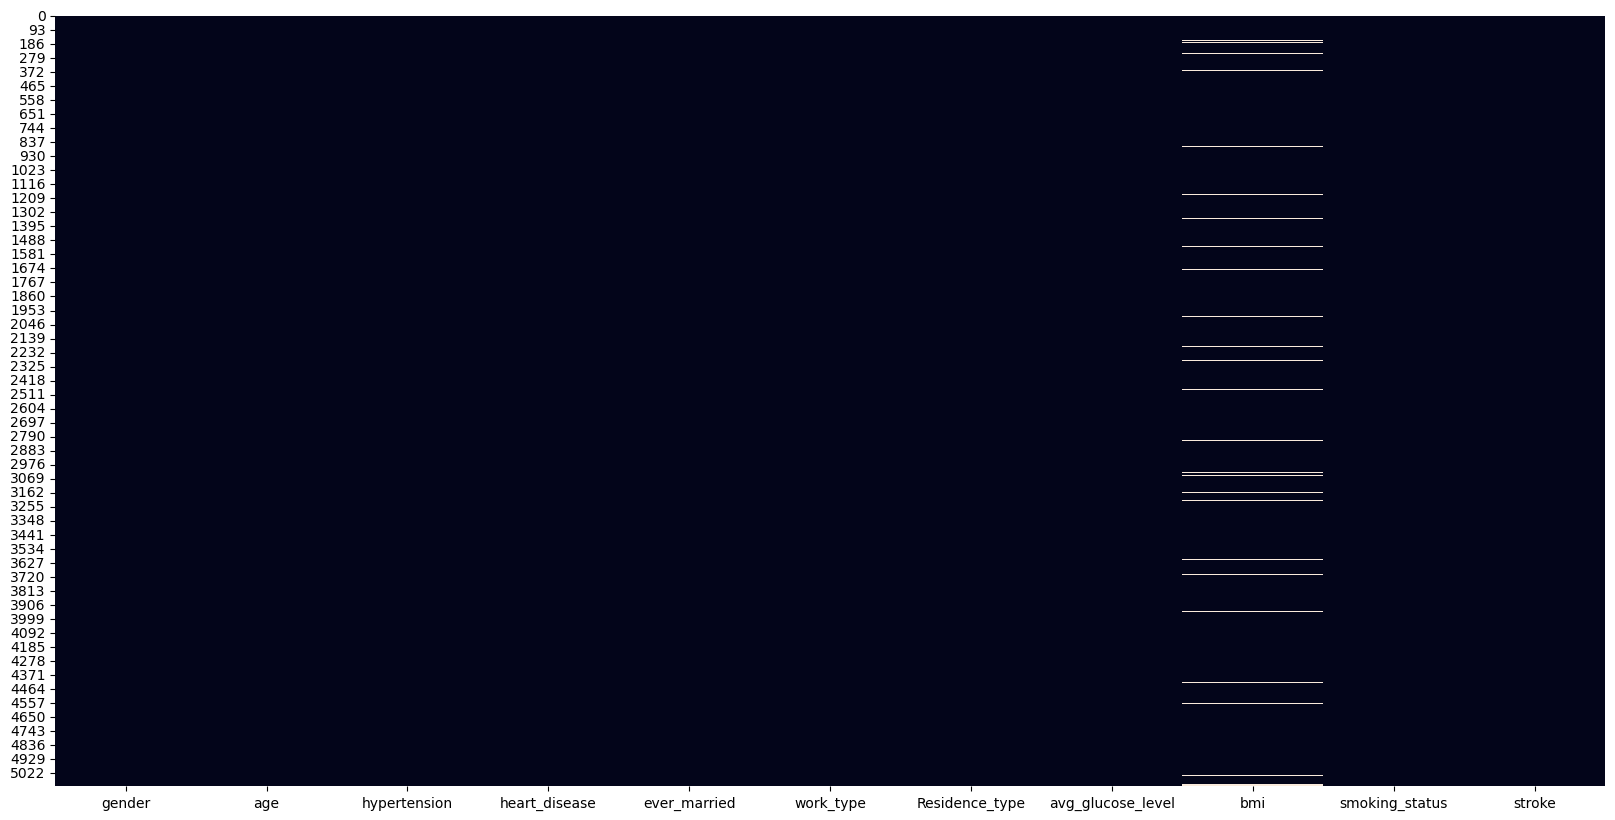

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

In [12]:
print(((df.isna().sum()/df.shape[0])*100).sort_values(ascending=True))

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
smoking_status       0.000000
stroke               0.000000
bmi                  3.933464
dtype: float64


In [13]:
#df=df.dropna()
print(df.shape)

(5110, 11)


<Axes: >

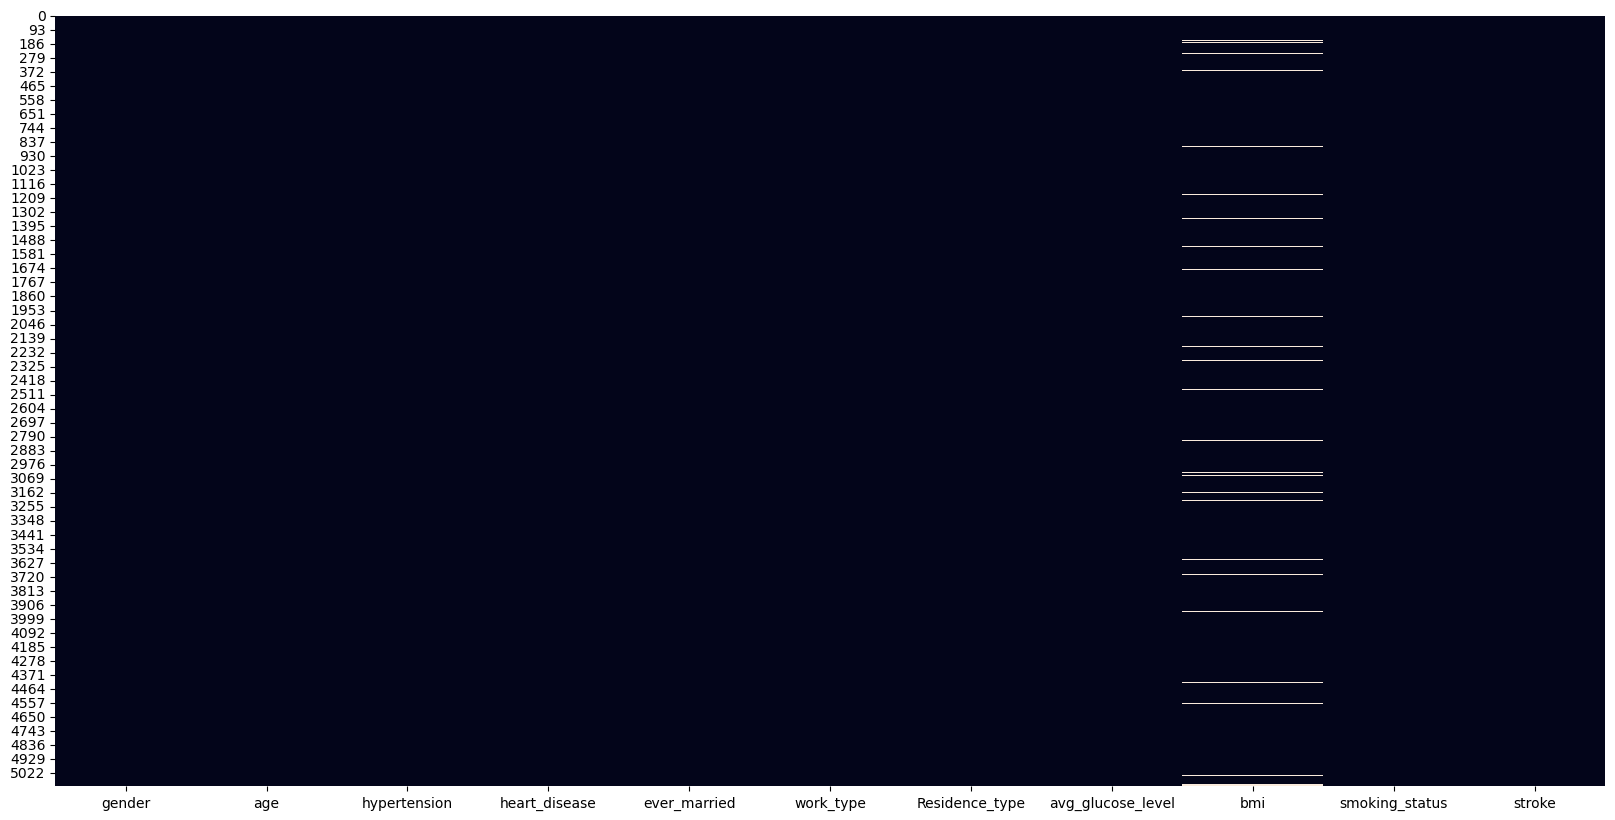

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

#### 1-2 Analyse du Fond

-  **Visualisation de la variable cible**:
    - Seulement 4.87% sont positifs √† l'AVC


- **Signification des variables** :
  - Variables continues (float et int) :

    - **√Çge (`age`)** : La distribution est bimodale, avec des pics autour de 50 ans (adultes d'√¢ge moyen).
    - **Niveau moyen de glucose (`avg_glucose_level`)** : La distribution est asym√©trique vers la droite avec un pic autour de 100 mg/dL et une autre petite bosse autour de 200 mg/dL, indiquant la pr√©sence possible de sous-groupes de patients avec des niveaux de glucose plus √©lev√©s, potentiellement li√©s au diab√®te.

    - **Indice de masse corporelle (`bmi`)** : La distribution est normale, mais tout petit peu asym√©trique vers la droite, avec un pic autour de 25-30, correspondant √† la gamme de surpoids, et une petite queue droite indiquant des IMC tr√®s √©lev√©s chez certains patients.

    - **Hypertension** :La majorit√© des patients n'ont pas d'hypertension, mais une minorit√© significative (pr√®s de 10%) est affect√©e par cette condition. Cela peut √™tre un facteur de risque important √† consid√©rer dans la pr√©diction des AVC.

    - **Maladie cardiaque (`heart_disease`)** : Un pourcentage encore plus faible (5,40%) de patients est atteint de maladies cardiaques par rapport √† l'hypertension, mais √©tant donn√© que les maladies cardiaques sont un facteur de risque majeur pour les AVC, cette minorit√© pourrait √™tre tr√®s importante.

  - Variables continues (object) :

    - **Genre (`gender`)** : 58,6% des patients sont de sexe f√©minin.
   
    - **Statut matrimonial (`ever_married`)** : 65,6% des patients sont ou ont √©t√© mari√©s, tandis que 34,4% ne l'ont jamais √©t√©. Le mariage peut √™tre li√© √† certains comportements ou conditions de sant√©, ce qui pourrait √™tre pertinent pour la pr√©diction des AVC.

    - **Type de travail (`work_type`)** : La majorit√© des patients travaillent dans le secteur priv√© (57,2%), suivis par les travailleurs ind√©pendants (16,0%), les enfants (13,4%), ceux travaillant pour le gouvernement (12,9%), et une petite proportion n'a jamais travaill√© (0,4%). Cela montre que la majorit√© des patients sont actifs professionnellement, ce qui peut avoir un impact sur leur mode de vie et leur sant√©.

    - **Type de r√©sidence (`Residence_type`)** : Les patients sont presque √©galement r√©partis entre les zones urbaines (50,8%) et rurales (49,2%). 

    - **Statut de tabagisme (`smoking_status`)** : 37,0% des patients n'ont jamais fum√©, 17,3% ont fum√© par le pass√©, 15,4% fument actuellement, et 30,2% ont un statut de tabagisme inconnu. Le tabagisme est un facteur de risque important pour de nombreuses maladies, y compris les AVC. *Le grand pourcentage de statuts inconnus pourrait poser un d√©fi pour l'analyse*.

- **Relation Variables / Target** :

#### Relation entre les variables li√©es aux mesures corporelles/sanguines et la variable cible(stroke)

1. **Tableau crois√© d'`hypertension` par rapport √† `stroke`** :
   - **Observations** :
     - Parmi les patients sans hypertension (hypertension = 0), 4429 n'ont pas eu d'AVC et 183 en ont eu.
     - Parmi les patients avec hypertension (hypertension = 1), 432 n'ont pas eu d'AVC et 66 en ont eu.
   - **Interpr√©tation** :
     - Le taux d'AVC est plus √©lev√© chez les patients hypertendus (environ 13,25%) compar√© aux patients non hypertendus (environ 3,97%). Cela indique que l'hypertension est un facteur de risque significatif pour les AVC.

2. **Tableau crois√© de `heart_disease` par rapport √† `stroke`** :
   - **Observations** :
     - Parmi les patients sans maladie cardiaque (heart_disease = 0), 4632 n'ont pas eu d'AVC et 202 en ont eu.
     - Parmi les patients avec maladie cardiaque (heart_disease = 1), 229 n'ont pas eu d'AVC et 47 en ont eu.
   - **Interpr√©tation** :
     - Le taux d'AVC est √©galement plus √©lev√© chez les patients ayant une maladie cardiaque (environ 17,03%) compar√© √† ceux sans maladie cardiaque (environ 4,18%). Cela renforce l'id√©e que les maladies cardiaques sont un facteur de risque important pour les AVC.

3. **Distribution de `avg_glucose_level` par statut d'AVC** :
   - **Observations** :
     - Les patients ayant subi un AVC (courbe bleue) pr√©sentent une distribution des niveaux de glucose plus √©tal√©e, avec une seconde bosse autour de 200 mg/dL, absente chez les patients n'ayant pas subi d'AVC.
     - Les patients sans AVC ont une distribution de glucose concentr√©e autour de 100 mg/dL.
   - **Interpr√©tation** :
     - Un niveau de glucose √©lev√© semble √™tre associ√© √† un risque accru d'AVC. Les patients ayant des niveaux de glucose tr√®s √©lev√©s (au-del√† de 150 mg/dL) sont plus susceptibles d'avoir subi un AVC.

4. **Distribution de `bmi` par statut d'AVC** :
   - **Observations** :
     - Les distributions de l'IMC (Indice de Masse Corporelle) sont similaires pour les patients avec et sans AVC, mais la courbe pour les patients avec AVC est l√©g√®rement d√©plac√©e vers la droite, indiquant des IMC plus √©lev√©s.
   - **Interpr√©tation** :
     - Bien que la diff√©rence ne soit pas aussi marqu√©e que pour le glucose, les patients avec un IMC plus √©lev√© semblent avoir un risque l√©g√®rement accru d'AVC.

#### Relation entre les variables d√©mographiques et comportementales et la variable cible(stroke)

1. **Genre (`gender`)** :
   - **Observations** :
     - Parmi les patients sans AVC, 2853 (58,7%) sont des femmes et 2007 (41,2%) sont des hommes, avec un seul patient class√© dans la cat√©gorie "Other".
     - Parmi les patients ayant subi un AVC, 141 (56,6%) sont des femmes et 108 (43,4%) sont des hommes.
   - **Interpr√©tation** :
     - Le taux d'AVC est similaire entre les femmes (4,7%) et les hommes (5,1%). Il n'y a donc pas de diff√©rence significative entre les genres concernant le taux d'AVC dans cet ensemble de donn√©es.

2. **√Çge (`age`)** :
   - **Observations** :
     - La distribution montre que plus de la moiti√© des patients ayant subi un AVC ont 60 ans ou plus, avec un pic autour de 80 ans.
     - Les patients sans AVC sont r√©partis sur une gamme plus large d'√¢ges, avec une concentration notable autour de 50 ans.
   - **Interpr√©tation** :
     - L'√¢ge est un facteur de risque important pour l'AVC, avec plus de la moiti√© des cas d'AVC chez les personnes de 60 ans et plus, compar√© √† seulement 15,3% pour les patients plus jeunes. Les patients √¢g√©s sont donc beaucoup plus susceptibles d'avoir un AVC.

3. **Statut matrimonial (`ever_married`)** :
   - **Observations** :
     - Parmi les patients sans AVC, 3133 (64,4%) sont mari√©s ou ont √©t√© mari√©s, contre 1728 (35,6%) qui ne l'ont jamais √©t√©.
     - Parmi les patients ayant subi un AVC, 220 (88,4%) sont mari√©s ou ont √©t√© mari√©s, contre seulement 29 (11,6%) qui ne l'ont jamais √©t√©.
   - **Interpr√©tation** :
     - Le fait d'√™tre mari√© ou d'avoir √©t√© mari√© est associ√© √† un taux d'AVC plus √©lev√© (6,6%) compar√© √† ceux qui ne l'ont jamais √©t√© (1,6%). Cela pourrait √™tre li√© √† l'√¢ge, car les personnes mari√©es ou ayant √©t√© mari√©es sont souvent plus √¢g√©es, un facteur de risque important pour les AVC.

4. **Type de travail (`work_type`)** :
   - **Observations** :
     - La majorit√© des patients travaillent dans le secteur priv√©, avec 2776 (59,3%) sans AVC et 149 (5,1%) avec AVC.
     - Les autres types de travail ont des r√©partitions similaires, avec 65 (7,9%) des travailleurs ind√©pendants ayant subi un AVC, et 33 (5,0%) dans le secteur public.
   - **Interpr√©tation** :
     - Le taux d'AVC est relativement uniforme parmi les diff√©rents types de travail, avec environ 4,9% des patients ayant subi un AVC dans le secteur priv√©, 7,9% parmi les travailleurs ind√©pendants, et 5,0% dans le secteur public. Le type de travail ne semble pas √™tre un facteur d√©terminant majeur pour le risque d'AVC dans cet ensemble de donn√©es.

5. **Type de r√©sidence (`Residence_type`)** :
   - **Observations** :
     - La r√©partition est presque √©gale entre les patients vivant en zone rurale et urbaine. Parmi les patients sans AVC, 2400 (49,4%) vivent en zone rurale et 2461 (50,6%) en zone urbaine.
     - Parmi les patients ayant subi un AVC, 114 (45,2%) vivent en zone rurale et 135 (54,8%) en zone urbaine.
   - **Interpr√©tation** :
     - Le risque d'AVC est l√©g√®rement plus √©lev√© en zone urbaine (5,2%) par rapport √† la zone rurale (4,5%), mais cette diff√©rence est relativement faible. Le type de r√©sidence ne semble pas √™tre un facteur d√©terminant significatif pour les AVC dans cet ensemble de donn√©es.

6. **Statut de tabagisme (`smoking_status`)** :
   - **Observations** :
     - Le plus grand groupe de patients sans AVC n'a jamais fum√©, avec 1802 (36,4%), suivi de ceux ayant un statut de tabagisme inconnu (1497, 30,2%).
     - Parmi les patients ayant subi un AVC, 90 (4,8%) n'ont jamais fum√©, tandis que 47 (3,0%) ont un statut de tabagisme inconnu, 70 (7,9%) sont d'anciens fumeurs, et 42 (5,3%) fument actuellement.
   - **Interpr√©tation** :
     - Le tabagisme est associ√© √† un risque accru d'AVC, avec un taux d'AVC de 7,9% chez les anciens fumeurs et de 5,3% chez les fumeurs actuels. Toutefois, les AVC surviennent √©galement chez ceux qui n'ont jamais fum√©, ce qui sugg√®re que d'autres facteurs de risque sont √©galement en jeu.

### Conclusion G√©n√©rale

L'hypertension, les maladies cardiaques, et des niveaux √©lev√©s de glucose sont des facteurs de risque majeurs pour les AVC. L'√¢ge est √©galement un facteur d√©terminant, avec un risque accru chez les personnes √¢g√©es. Le statut matrimonial et le tabagisme sont li√©s √† un risque plus √©lev√©, bien que leur impact soit moins prononc√©. Tout ceci poura etre confirm√© par des testes estatistiques.



In [15]:
print(df["stroke"].value_counts())

stroke
0    4861
1     249
Name: count, dtype: int64


In [16]:
continuous_var=[var for var in df.columns if df[var].dtype=="float64"]
Categoricals_var=[var for var in df.columns if df[var].dtype=="object"]

print("Les variables continue sont : ", continuous_var)
print("Les variables categorielles sont : ", Categoricals_var)

Les variables continue sont :  ['age', 'avg_glucose_level', 'bmi']
Les variables categorielles sont :  ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


##### Variables Quantitatives

C:\Users\gpres\AppData\Local\Temp\ipykernel_39748\2241253632.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True)
c:\Users\gpres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gpres\AppData\Local\Temp\ipykernel_39748\2241253632.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibi

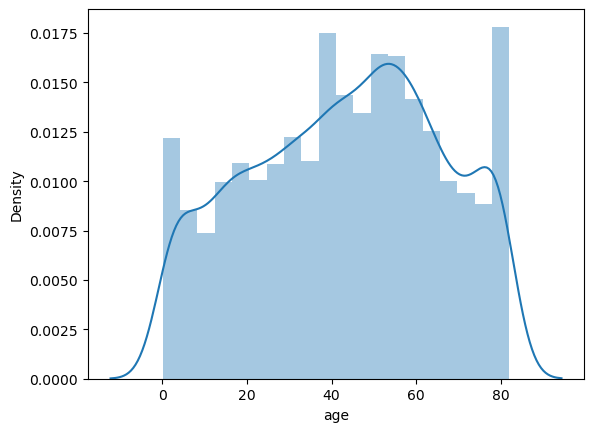

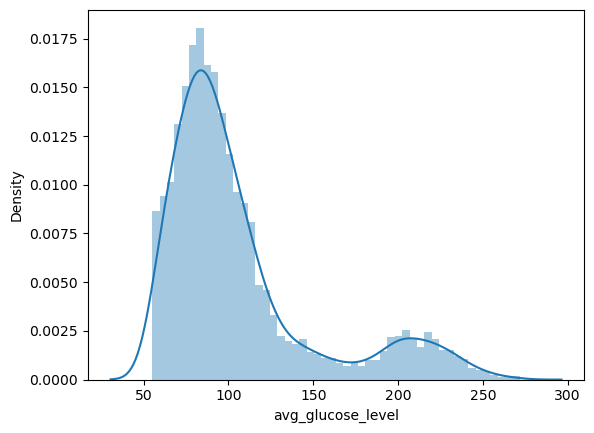

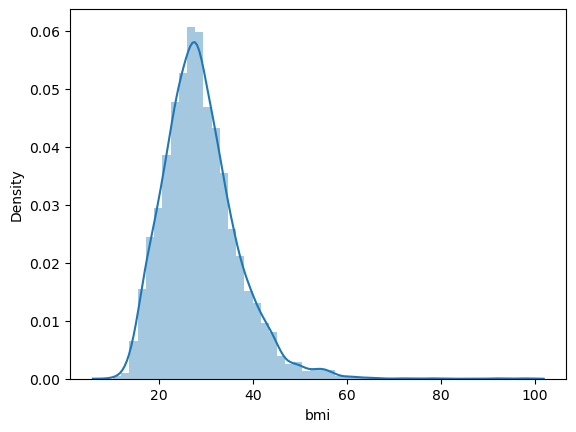

In [17]:
for col in continuous_var:
    plt.figure()
    sns.distplot(df[col],kde=True)

In [18]:
for col in df.select_dtypes('int64').columns:
    if col!="stroke":
        print(f"Distribution en % de la variable {col} : ")
        print(df[col].value_counts(normalize=True)*100)
        print("\n")

Distribution en % de la variable hypertension : 
hypertension
0    90.254403
1     9.745597
Name: proportion, dtype: float64


Distribution en % de la variable heart_disease : 
heart_disease
0    94.598826
1     5.401174
Name: proportion, dtype: float64




##### Variables Qualitatives

In [19]:
for col in Categoricals_var:
    print(f"{col:-<50} {df[col].unique()}")

gender-------------------------------------------- ['Male' 'Female' 'Other']
ever_married-------------------------------------- ['Yes' 'No']
work_type----------------------------------------- ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type------------------------------------ ['Urban' 'Rural']
smoking_status------------------------------------ ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


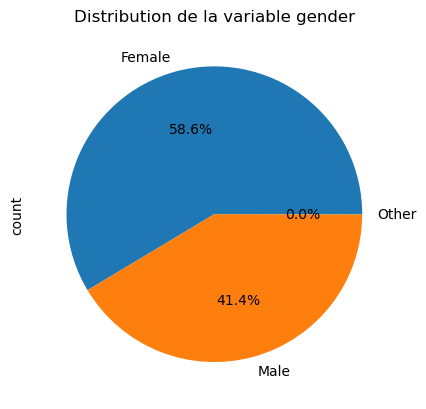

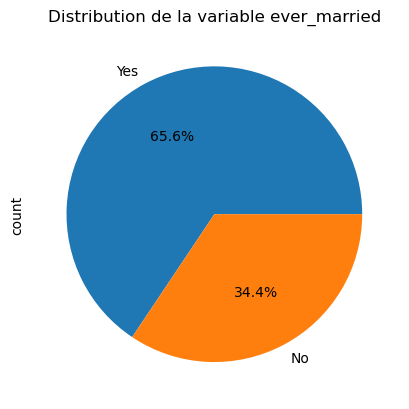

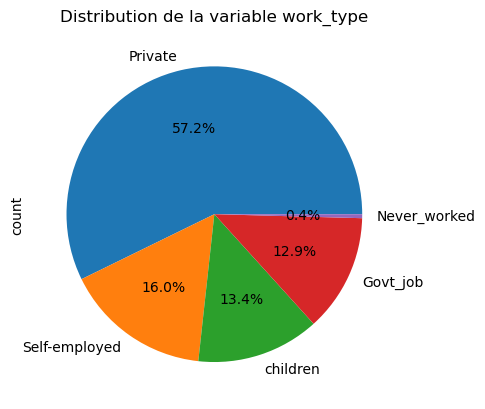

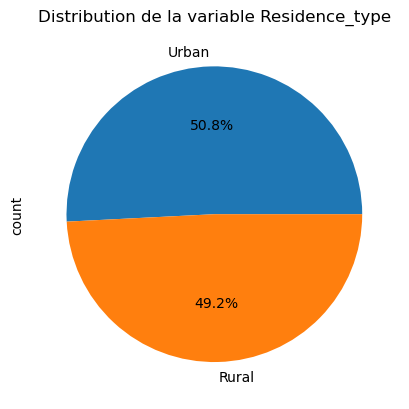

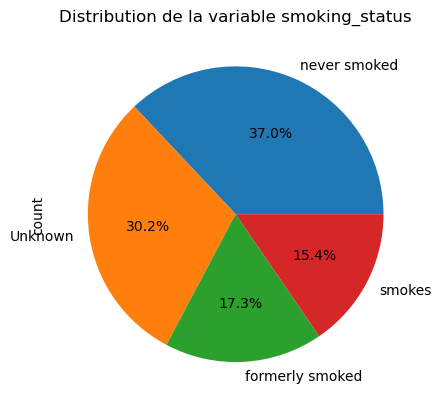

In [21]:
for col in Categoricals_var:
    plt.figure()
    df[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f"Distribution de la variable {col}")
    plt.show()
    print("\n")

#### Relation Target / Variables
##### Cr√©ation de sous-ensembles positifs et n√©gatifs

In [22]:
positive_df=df[df["stroke"]==1]
negative_df=df[df["stroke"]==0]

positive_df

gender   age  hypertension  heart_disease ever_married      work_type  \
0      Male  67.0             0              1          Yes        Private   
1    Female  61.0             0              0          Yes  Self-employed   
2      Male  80.0             0              1          Yes        Private   
3    Female  49.0             0              0          Yes        Private   
4    Female  79.0             1              0          Yes  Self-employed   
..      ...   ...           ...            ...          ...            ...   
244    Male  57.0             0              0          Yes        Private   
245  Female  14.0             0              0           No       children   
246  Female  75.0             0              0          Yes  Self-employed   
247    Male  71.0             1              0          Yes  Self-employed   
248  Female  78.0             0              0          Yes        Private   

    Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0            Urban             228.69  36.6  formerly smoked       1  
1            Rural             202.21   NaN     never smoked       1  
2            Rural             105.92  32.5     never smoked       1  
3            Urban             171.23  34.4           smokes       1  
4            Rural             174.12  24.0     never smoked       1  
..             ...                ...   ...              ...     ...  
244          Rural              84.96  36.7          Unknown       1  
245          Rural              57.93  30.9          Unknown       1  
246          Rural              78.80  29.3  formerly smoked       1  
247          Rural              87.80   NaN          Unknown       1  
248          Rural              78.81  19.6          Unknown       1  

[249 rows x 11 columns]

Pour des questions d'exploration nous allons cr√©er deux groupes des variables:
-    **les variables li√©es aux mesures corporelles/sanguines** et 
-    **les variables d√©mographiques et comportementales**

In [23]:
# Variables li√©es aux mesures corporelles/sanguines
biomedical_vars = [
    'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'
]

# Variables d√©mographiques et comportementales
demographic_behavioral_vars = [
    'gender', 'age', 'ever_married', 'work_type', 
    'Residence_type', 'smoking_status'
]

##### Relation entre les variables li√©es aux mesures corporelles/sanguines et la variable cible(stroke)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\gpres\AppData\Local\Temp\ipykernel_39748\1441723958.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_df[col], label='AVC Positif')
c:\Users\gpres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

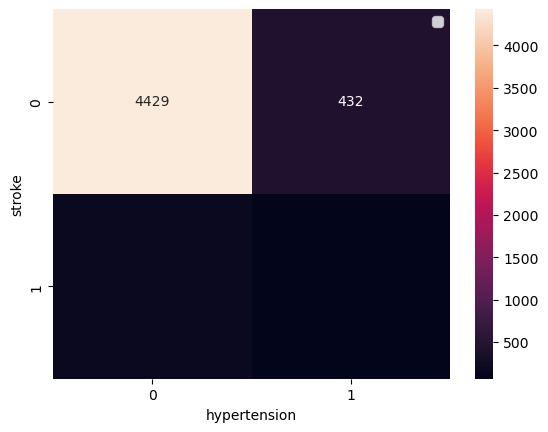

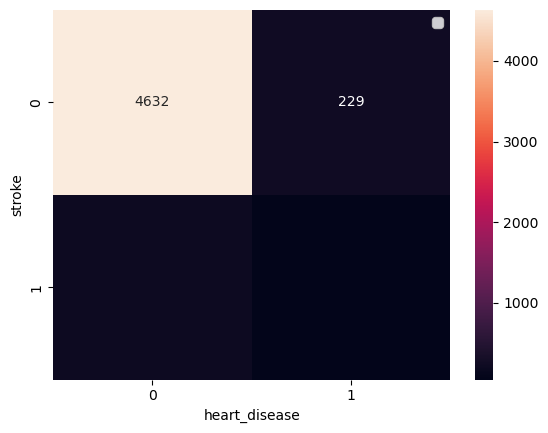

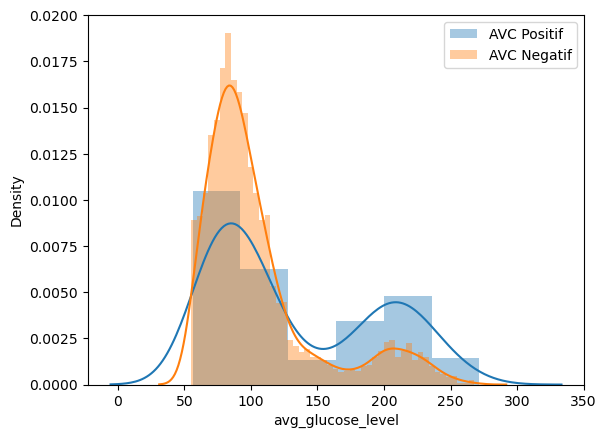

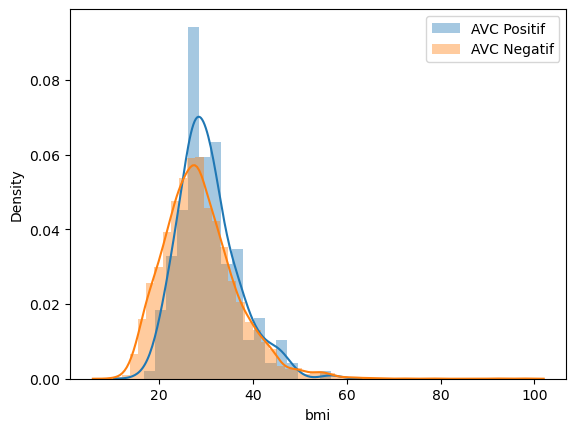

In [24]:
for col in biomedical_vars:
    if df[col].dtype=='float':
        plt.figure()
        sns.distplot(positive_df[col], label='AVC Positif')
        sns.distplot(negative_df[col],label='AVC Negatif')
        plt.legend()
    else:
        plt.figure()
        sns.heatmap(pd.crosstab(df['stroke'],df[col]),annot=True, fmt='d')
        plt.legend()

##### Relation entre les variables d√©mographiques et comportementales et la variable cible(stroke)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\gpres\AppData\Local\Temp\ipykernel_39748\124935086.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_df[col],label='AVC Positif')
c:\Users\gpres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gpres\AppData\Local\Temp\ipykernel_39748\124935086.py:5: UserWarni

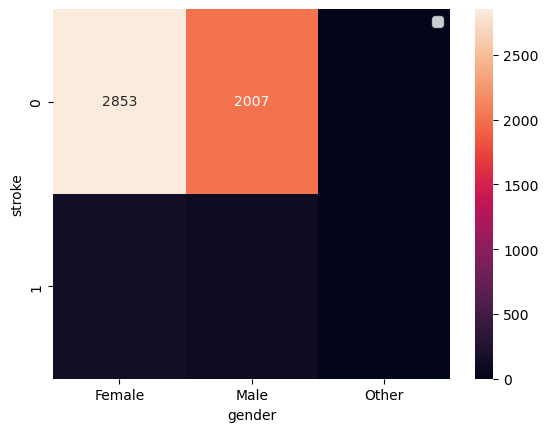

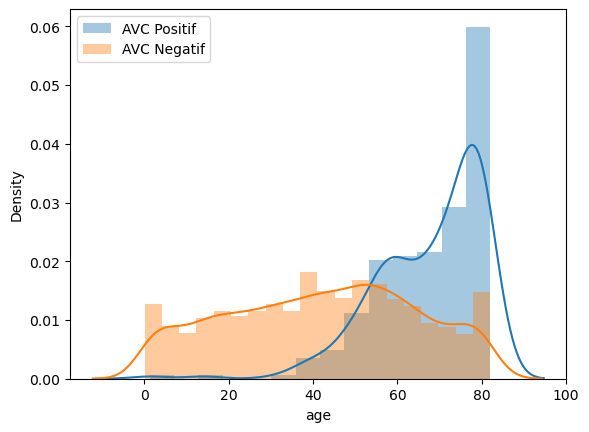

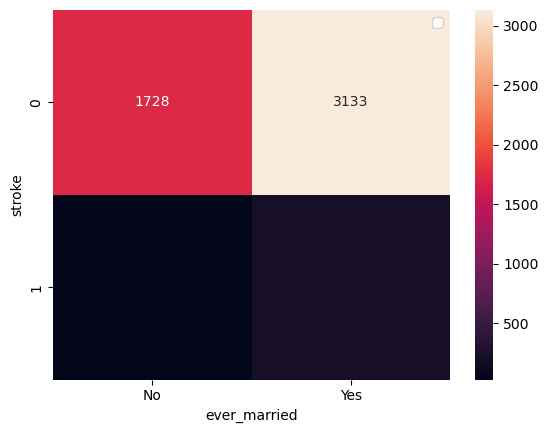

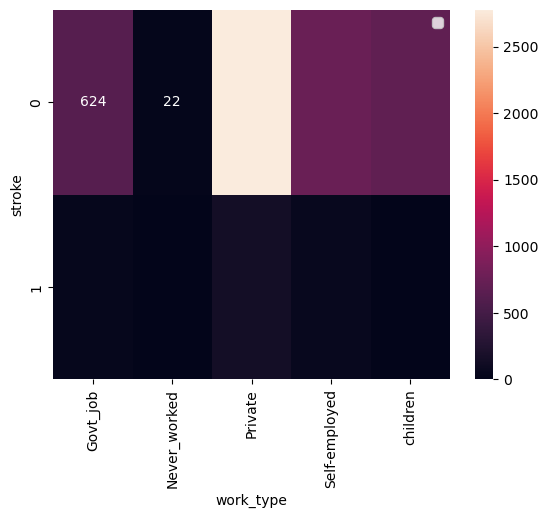

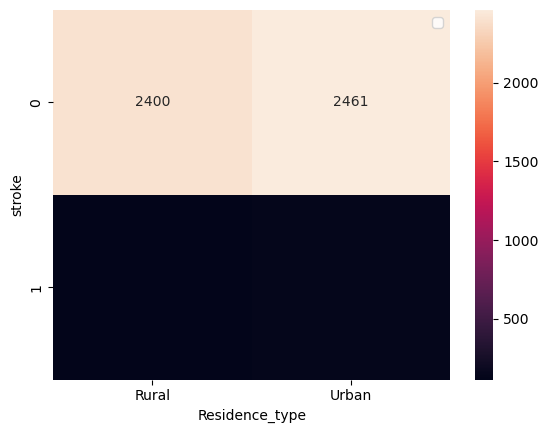

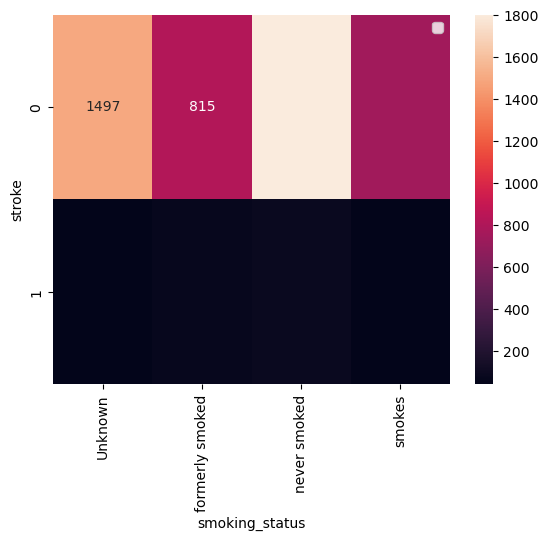

In [25]:
for col in demographic_behavioral_vars:
    if df[col].dtype=='float':
        plt.figure()
        sns.distplot(positive_df[col],label='AVC Positif')
        sns.distplot(negative_df[col],label='AVC Negatif')
        plt.legend()
    else:
        plt.figure()
        sns.heatmap(pd.crosstab(df["stroke"],df[col]),annot=True,fmt='d')
        plt.legend()

### 1-3 Analyse statistique inf√©rentielle


##### 3-1 Test du Chi-carr√© pour les variables cat√©gorielles

In [26]:
from scipy.stats import chi2_contingency

categorical_vars = ['hypertension', 'heart_disease', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for var in categorical_vars:
    tableau_contingence=pd.crosstab(df[var],df['stroke'])
    chi2,p_value, dof, expected=chi2_contingency(tableau_contingence)

    print(f"Test du Chi-carr√© pour {var} vs stroke(AVC)")
    print(f"p-value={p_value:.4f}")
    if p_value<0.05:
        print(f"--> Il y a une association significative entre {var} et stroke.\n")
    else:
        print(f"--> Il n'y a pas d'association significative entre {var} et stroke.\n")

Test du Chi-carr√© pour hypertension vs stroke(AVC)
p-value=0.0000
--> Il y a une association significative entre hypertension et stroke.

Test du Chi-carr√© pour heart_disease vs stroke(AVC)
p-value=0.0000
--> Il y a une association significative entre heart_disease et stroke.

Test du Chi-carr√© pour gender vs stroke(AVC)
p-value=0.7895
--> Il n'y a pas d'association significative entre gender et stroke.

Test du Chi-carr√© pour ever_married vs stroke(AVC)
p-value=0.0000
--> Il y a une association significative entre ever_married et stroke.

Test du Chi-carr√© pour work_type vs stroke(AVC)
p-value=0.0000
--> Il y a une association significative entre work_type et stroke.

Test du Chi-carr√© pour Residence_type vs stroke(AVC)
p-value=0.2983
--> Il n'y a pas d'association significative entre Residence_type et stroke.

Test du Chi-carr√© pour smoking_status vs stroke(AVC)
p-value=0.0000
--> Il y a une association significative entre smoking_status et stroke.



##### 3-2 Test t de Student ou Test U de Mann-Whitney pour les variables continues

Nous avons deux groupes √† comparer dans AVC, d'ou le choix du test t de Student ou Test U de Mann-Whitney pour les variables continues dependamment si les variables suivent une distrtibution normale ou pas.

In [27]:
from scipy.stats import mannwhitneyu, ttest_ind

# Variables continues √† tester contre 'stroke'
continuous_vars = ['age', 'avg_glucose_level', 'bmi']

for var in continuous_vars:

    group1 = df[df['stroke'] == 0][var]  # Groupe sans AVC
    group2 = df[df['stroke'] == 1][var]  # Groupe avec AVC

    if df[var].skew()<1: # Si la distribution est relativement normale
        stat, p_valeur=ttest_ind(group1,group2, equal_var=False)
        test_type="Test t de Student"
    else:
        stat,p_valeur=mannwhitneyu(group1,group2)
        test_type = "Test U de Mann-Whitney"

    print(f"{test_type} pour {var} vs stroke(AVC)")
    print(f"p-valeur={p_valeur:.4f}")
    if p_valeur < 0.05:
        print(f"--> Il y a une diff√©rence significative dans les {var} entre les groupes avec et sans AVC.\n")
    else:
        print(f"--> Il n'y a pas de diff√©rence significative dans les {var} entre les groupes avec et sans AVC.\n")

Test t de Student pour age vs stroke(AVC)
p-valeur=0.0000
--> Il y a une diff√©rence significative dans les age entre les groupes avec et sans AVC.

Test U de Mann-Whitney pour avg_glucose_level vs stroke(AVC)
p-valeur=0.0000
--> Il y a une diff√©rence significative dans les avg_glucose_level entre les groupes avec et sans AVC.

Test U de Mann-Whitney pour bmi vs stroke(AVC)
p-valeur=nan
--> Il n'y a pas de diff√©rence significative dans les bmi entre les groupes avec et sans AVC.



#### Conclusion

Les tests statistiques confirment que plusieurs facteurs sont significativement associ√©s au risque d'AVC :

- **Facteurs de Risque Significatifs** :
  - **Hypertension** : Les patients hypertendus ont un risque significativement plus √©lev√© d'AVC.
  - **Maladies Cardiaques (`heart_disease`)** : Les maladies cardiaques augmentent significativement le risque d'AVC.
  - **Statut Matrimonial (`ever_married`)** : √ätre mari√© ou avoir √©t√© mari√© est associ√© √† un risque accru d'AVC, probablement li√© √† l'√¢ge.
  - **Type de Travail (`work_type`)** : Certaines professions, notamment dans le secteur priv√© et ind√©pendant, montrent un risque plus √©lev√© d'AVC.
  - **Statut de Tabagisme (`smoking_status`)** : Le tabagisme est significativement li√© √† un risque accru d'AVC.
  - **√Çge (`age`)** : L'√¢ge avanc√© est un facteur de risque majeur pour l'AVC.
  - **Niveau de Glucose Moyen (`avg_glucose_level`)** : Des niveaux √©lev√©s de glucose sont associ√©s √† un risque accru d'AVC.
  

- **Facteurs Non Significatifs** :
  - **Genre (`gender`)** : Le risque d'AVC est similaire pour les hommes et les femmes.
  - **Type de R√©sidence (`Residence_type`)** : Le lieu de r√©sidence (rurale vs urbaine) n'affecte pas significativement le risque d'AVC.
  - **Indice de Masse Corporelle (`bmi`)** : il n'y a pas d'association entre `bmi` et `AVC`

Ces r√©sultats sugg√®rent que les strat√©gies de pr√©vention des AVC devraient se concentrer sur la gestion de l'hypertension, des maladies cardiaques, du contr√¥le du glucose, et sur les groupes √† risque en fonction de leur √¢ge, statut matrimonial, type de travail et tabagisme.


## 2- Pre-Processing

### 2-1- TrainTest -Nettoyage - Encodage

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

In [29]:
categorical_vars = ['gender','ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease']
numeric_vars = ['age', 'avg_glucose_level', 'bmi']

In [30]:
other_gender_observation=df[df['gender']=='Other']

df=df[df['gender']!='Other']

In [31]:
df.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1

In [32]:
for col in Categoricals_var:
    print(f"{col:-<50} {df[col].unique()}")

gender-------------------------------------------- ['Male' 'Female']
ever_married-------------------------------------- ['Yes' 'No']
work_type----------------------------------------- ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type------------------------------------ ['Urban' 'Rural']
smoking_status------------------------------------ ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [81]:
df_trainset, df_testset=train_test_split(df, test_size=0.3,random_state=0)

df_trainset.to_csv("D:/Perso/Detection_AVC/data/train.csv", index=False)
df_testset.to_csv("D:/Perso/Detection_AVC/data/test.csv", index=False)

In [36]:
print(df_trainset["stroke"].value_counts())

stroke
0    3403
1     173
Name: count, dtype: int64


In [37]:
print(df_testset["stroke"].value_counts())

stroke
0    1457
1      76
Name: count, dtype: int64


In [38]:
encoder = LabelEncoder()
scaler = StandardScaler()
numeric_vars = ['age', 'avg_glucose_level','bmi']
categorical_vars = ['gender','ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease']

def encodage(df):
    # Encodage des variables cat√©gorielles
    df = pd.get_dummies(df, columns=categorical_vars, drop_first=False)

    # Convertir les bool√©ens True/False en 0/1
    df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))
    
    # Mise √† l'√©chelle des variables num√©riques
    df[numeric_vars] = scaler.fit_transform(df[numeric_vars])
    
    return df

In [39]:
#encodage(df)

In [40]:
from sklearn.impute import KNNImputer

imputer=KNNImputer(n_neighbors=5)

def imputation(df):
    #df=df.dropna(axis=0)
    #df=df.fillna(-999)
    df[["bmi"]]=imputer.fit_transform(df[["bmi"]])

    #df["smoking_status"]=df["smoking_status"].replace('Unknown', 'Non D√©clar√©')

    return df

In [41]:
def preprocessing(df):

    df=imputation(df)
    df=encodage(df)

    X=df.drop("stroke",axis=1)
    y=df["stroke"]

    print(y.value_counts())

    return X,y

In [42]:
#df=imputation(df)

In [43]:
#X_test,y_test=preprocessing(testset)

In [44]:
#y_train

In [45]:
#X_train

### 2-2 Le reechantillonnage avec SMOTE et de la Ponderation des cLasse combin√©s

In [46]:
#pip install imblearn

In [47]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler

In [48]:
resamplers = {
    'SMOTE': SMOTE(),
    'Random Under Sampling': RandomUnderSampler(),  # Ajoutez les parenth√®ses ici
    'SMOTE with Tomek Links': SMOTETomek(),
    'Random Over Sampling': RandomOverSampler()
}


### 2-3 Etablissement d'un modele de base

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFECV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.pipeline import make_pipeline as make_imb_pipeline

In [50]:
# Mod√®les √† comparer
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Xgboost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

#### 2-2-1 Procedure d'√©valuation

In [51]:
from sklearn.metrics import f1_score,confusion_matrix,classification_report,accuracy_score,precision_score,recall_score, roc_auc_score, roc_curve, RocCurveDisplay, log_loss
from sklearn.model_selection import learning_curve, StratifiedKFold

In [52]:
import mlflow
import mlflow.sklearn
import mlflow.xgboost

In [53]:
# Config MLflow (local tracking URI)
mlflow.set_tracking_uri("http://localhost:5000")

In [54]:

"""
# D√©finir le nom de l'exp√©rience dans MLflow (sera visible dans UI)
mlflow.set_experiment("avc_detection_mlflow_3")

# On ferme tout run restant actif
mlflow.end_run()

# Boucle sur les mod√®les √† tester (Logistic, Random Forest, etc.)
for name, model in models.items():
    # D√©marrer un run MLflow (chaque mod√®le est un run distinct)
    with mlflow.start_run(run_name=name):
        
        # Entra√Ænement du mod√®le
        model.fit(X_train, y_train)

        # Pr√©diction des classes (0 ou 1)
        y_pred = model.predict(X_test)

        # V√©rifie si le mod√®le peut retourner des probabilit√©s (ex: LogisticRegression)
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]  # Probabilit√© d'appartenir √† la classe 1
        else:
            y_proba = y_pred  # fallback (moins pr√©cis pour les m√©triques proba)

        # Calcul des m√©triques
        acc = accuracy_score(y_test, y_pred)         # Pr√©cision
        auc = roc_auc_score(y_test, y_proba)         # Zone sous la courbe ROC
        loss = log_loss(y_test, y_proba)            # Log loss (p√©nalise les mauvaises confiances)
        rappel = recall_score(y_test, y_pred)
        score_f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        
        cm = confusion_matrix (y_test, y_pred)
        plt.figure(figsize=(6,4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion matrix  - {name}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.savefig(f'{name}_cm.png')

        # Log des hyperparam√®tres et des m√©triques dans MLflow
        mlflow.log_param("model_name", name)
        mlflow.log_metric("accuracy", acc)
        mlflow.log_metric("roc_auc", auc)
        mlflow.log_metric("log_loss", loss)
        mlflow.log_metric("recall", rappel)
        mlflow.log_metric("f1_score", score_f1)
        mlflow.log_metric("precision", precision)
        mlflow.log_artifacts(f'{name}_cm.png')

        # Exemple d'entr√©e pour le mod√®le (facilite le d√©ploiement)
        input_example = pd.DataFrame(X_test[:5], columns=X_test.columns)

        # Signature du mod√®le (structure des inputs/outputs)
        signature = mlflow.models.infer_signature(X_test, y_pred)

        # Enregistrement du mod√®le dans MLflow
        mlflow.sklearn.log_model(
            sk_model=model,                # Le mod√®le entra√Æn√©
            artifact_path="model",        # Emplacement dans MLflow
            input_example=input_example,  # Exemple d'entr√©e
            signature=signature           # Signature pour le d√©ploiement
        )

        # Affiche dans le terminal que le run est fini
        print(f"Fin run : {name}")
        
        """

'\n# D√©finir le nom de l\'exp√©rience dans MLflow (sera visible dans UI)\nmlflow.set_experiment("avc_detection_mlflow_3")\n\n# On ferme tout run restant actif\nmlflow.end_run()\n\n# Boucle sur les mod√®les √† tester (Logistic, Random Forest, etc.)\nfor name, model in models.items():\n    # D√©marrer un run MLflow (chaque mod√®le est un run distinct)\n    with mlflow.start_run(run_name=name):\n        \n        # Entra√Ænement du mod√®le\n        model.fit(X_train, y_train)\n\n        # Pr√©diction des classes (0 ou 1)\n        y_pred = model.predict(X_test)\n\n        # V√©rifie si le mod√®le peut retourner des probabilit√©s (ex: LogisticRegression)\n        if hasattr(model, "predict_proba"):\n            y_proba = model.predict_proba(X_test)[:, 1]  # Probabilit√© d\'appartenir √† la classe 1\n        else:\n            y_proba = y_pred  # fallback (moins pr√©cis pour les m√©triques proba)\n\n        # Calcul des m√©triques\n        acc = accuracy_score(y_test, y_pred)         # Pr√©

In [55]:
def resampling(X_train, y_train):
    resampler = RandomOverSampler()
    X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)
    
    return X_train_resampled, y_train_resampled

## 3- Modelisation

#### 3-1- Choix du modele id√©al

In [56]:
from sklearn.svm import SVC
from mlflow.tracking import MlflowClient
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

from sklearn.metrics import (
    roc_curve, auc, precision_recall_curve,
    ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
)
from sklearn.model_selection import learning_curve

In [57]:
# D√©finir le pr√©processeur
preprocessor = make_pipeline(
    PolynomialFeatures(2),
    SelectKBest(f_classif, k=20)
)

In [58]:
# D√©finition des mod√®les
RandomForest = make_pipeline(
    preprocessor,
    RandomForestClassifier(random_state=0)
)

LogRegression = make_pipeline(
    preprocessor,
    LogisticRegression() 
)

AdaBoost = make_pipeline(
    preprocessor,
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=50,
        learning_rate=1.0,
        random_state=0
    )
)

SVM = make_pipeline(
    preprocessor,
    StandardScaler(),
    SVC(kernel='poly', degree=3, C=1.0, class_weight='balanced', probability=True, random_state=0)
)

KNN = make_pipeline(
    preprocessor,
    StandardScaler(),
    KNeighborsClassifier()
)

In [59]:
dict_of_models = {
    'RandomForest': RandomForest,
    'AdaBoost': AdaBoost,
    'LogRegression': LogRegression,
    'SVM': SVM,
    'KNN': KNN
}

In [60]:
def plot_and_log_curves(model, X_train, y_train, X_test, y_test, name):

    try:
        y_proba = model.predict_proba(X_test)[:, 1]
    except:
        y_proba = model.decision_function(X_test)
        y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())

    # ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure()
    auc_score = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend()
    roc_path = f"{name}_roc.png"
    plt.savefig(roc_path)
    mlflow.log_artifact(roc_path)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.figure()
    plt.plot(recall, precision)
    plt.xlabel("Recall"); plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve - {name}")
    pr_path = f"{name}_pr.png"
    plt.savefig(pr_path)
    mlflow.log_artifact(pr_path)

    # Learning Curve
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='f1')
    plt.figure()
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Train")
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Validation")
    plt.xlabel("Training examples"); plt.ylabel("F1 score")
    plt.title(f"Learning Curve - {name}")
    plt.legend()
    lc_path = f"{name}_lc.png"
    plt.savefig(lc_path)
    mlflow.log_artifact(lc_path)

    # Matrice de confusion normalis√©e
    y_pred = model.predict(X_test)
    plt.figure()
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')
    disp.plot(cmap="Blues", values_format=".2f")
    plt.title(f"Confusion Matrix (normalized) - {name}")
    norm_cm_path = f"{name}_cm_norm.png"
    plt.savefig(norm_cm_path)
    mlflow.log_artifact(norm_cm_path)

In [61]:
"""
# D√©finition d'une nouvelle exp√©rience MLflow (visible dans l‚Äôinterface MLflow UI)
import mlflow.models
import mlflow.sklearn


mlflow.set_experiment("avc_detection_mlflow_3_test_models")

# Fermeture de tout run MLflow actif restant
mlflow.end_run()

# Boucle sur chaque mod√®le √† tester (Logistic Regression, RF, etc.)
for name, model in dict_of_models.items():
    with mlflow.start_run(run_name=name): # D√©marrage d'un run pour le mod√®le courant
        model.fit(X_train_resampled, y_train_resampled) # Entra√Ænement du mod√®le sur les donn√©es r√©√©quilibr√©es
        
        y_pred=model.predict(X_test) # Pr√©diction des classes
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
        else:
            y_proba = model.decision_function(X_test)
        
        # --- M√©triques de performance ---
        acc = accuracy_score(y_test, y_pred) #Taux de bonnes classification
        auc = roc_auc_score(y_test, y_proba) #Performance globale (aire sous la courbe de ROC)
        loss = log_loss(y_test, y_proba) # Erreur logarithmique
        rappel = recall_score(y_test, y_pred) # Rappel (le True positive rate)
        precision = precision_score(y_test, y_pred) #Pr√©cision (exactitude des pr√©dictions positives)
        score_f1 = f1_score(y_test, y_pred) #Moyenne harmonique entre precision et rappel
        
        
        # --- Matrice de confusion ---
        cm = confusion_matrix(y_test, y_pred) # Calcule la matrice de confusion
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title(f'Confusion Matric - {name}')
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.savefig(f'{name}_cm.png')
        
        
        # --- Enregistrement dans MLflow ---
        mlflow.log_param("model_name", name)
        mlflow.log_metrics({
            "Accuracy":acc,
            "roc_auc":auc,
            "log_loss":loss,
            "Precision":precision,
            "Recall":rappel,
            "f1_score":score_f1
        })
        mlflow.log_artifact(f'{name}_cm.png')
        
        # Exemple d‚Äôentr√©e du mod√®le (utile pour d√©ploiement et test rapide via API)
        signature = pd.DataFrame(X_test[:5], columns=X_test.columns)
        
        # Signature du mod√®le : structure attendue en entr√©e/sortie
        signature = mlflow.models.infer_signature(X_test, y_pred)
        
        # Enregistrement du mod√®le avec sa signature et exemple d‚Äôentr√©e
        mlflow.sklearn.log_model(
            sk_model = model,
            artifact_path = "model",
            input_example = input_example,
            signature = signature
        )
        
        # Courbes et visualisation
        plot_and_log_curves(model, X_train_resampled, y_train_resampled, X_test, y_test, name)
        
        print(f'Fin du run : {name}')
        """

'\n# D√©finition d\'une nouvelle exp√©rience MLflow (visible dans l‚Äôinterface MLflow UI)\nimport mlflow.models\nimport mlflow.sklearn\n\n\nmlflow.set_experiment("avc_detection_mlflow_3_test_models")\n\n# Fermeture de tout run MLflow actif restant\nmlflow.end_run()\n\n# Boucle sur chaque mod√®le √† tester (Logistic Regression, RF, etc.)\nfor name, model in dict_of_models.items():\n    with mlflow.start_run(run_name=name): # D√©marrage d\'un run pour le mod√®le courant\n        model.fit(X_train_resampled, y_train_resampled) # Entra√Ænement du mod√®le sur les donn√©es r√©√©quilibr√©es\n        \n        y_pred=model.predict(X_test) # Pr√©diction des classes\n        if hasattr(model, "predict_proba"):\n            y_proba = model.predict_proba(X_test)[:, 1]\n        else:\n            y_proba = model.decision_function(X_test)\n        \n        # --- M√©triques de performance ---\n        acc = accuracy_score(y_test, y_pred) #Taux de bonnes classification\n        auc = roc_auc_score(y

In [62]:
param_grid=LogRegression.get_params()
print(param_grid)

{'memory': None, 'steps': [('pipeline', Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('selectkbest', SelectKBest(k=20))])), ('logisticregression', LogisticRegression())], 'verbose': False, 'pipeline': Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('selectkbest', SelectKBest(k=20))]), 'logisticregression': LogisticRegression(), 'pipeline__memory': None, 'pipeline__steps': [('polynomialfeatures', PolynomialFeatures()), ('selectkbest', SelectKBest(k=20))], 'pipeline__verbose': False, 'pipeline__polynomialfeatures': PolynomialFeatures(), 'pipeline__selectkbest': SelectKBest(k=20), 'pipeline__polynomialfeatures__degree': 2, 'pipeline__polynomialfeatures__include_bias': True, 'pipeline__polynomialfeatures__interaction_only': False, 'pipeline__polynomialfeatures__order': 'C', 'pipeline__selectkbest__k': 20, 'pipeline__selectkbest__score_func': <function f_classif at 0x000002309B700EA0>, 'logisticregression__C': 1.0, 'logisticreg

In [63]:
param_grid = {
    'poly__degree': [2],
    'select__k': [10, 15, 20],
    'logreg__solver': ['saga'],
    'logreg__max_iter': [500],
    'logreg__C': [0.1, 1, 10],
}

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold

#### 3-2- Entrainement du modele final avec Adaboost optimis√© avec GridSerchCV

In [65]:
from     sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [66]:
final_model=Pipeline(steps=[
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('select', SelectKBest(k=20)),
    ('logreg', LogisticRegression())
])
final_model

Pipeline(steps=[('poly', PolynomialFeatures()), ('scaler', StandardScaler()),
                ('select', SelectKBest(k=20)),
                ('logreg', LogisticRegression())])

In [67]:
model_final = RandomizedSearchCV(
    estimator=final_model,  # ton pipeline complet
    param_distributions=param_grid,
    n_iter=10,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

model_final.fit(X_train_resampled, y_train_resampled)

print("Meilleurs hyperparam√®tres :", model_final.best_params_)
print("Score F1 optimal :", model_final.best_score_)


NameError: name 'X_train_resampled' is not defined

## Entrainement final

In [69]:
import mlflow
import mlflow.models
import mlflow.sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, log_loss, ConfusionMatrixDisplay
)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from mlflow.models.signature import infer_signature
import os

2025/06/22 22:59:42 INFO mlflow.tracking.fluent: Experiment with name 'avc_detection_Entrainement_FInal_CLEAN_5' does not exist. Creating a new experiment.
c:\Users\gpres\anaconda3\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


‚úÖ Fin du run : LogisticRegression_Optimised
üèÉ View run LogisticRegression_Optimised at: http://localhost:5000/#/experiments/407916675297022278/runs/d627e37630684f1fb287a7c99ea66808
üß™ View experiment at: http://localhost:5000/#/experiments/407916675297022278


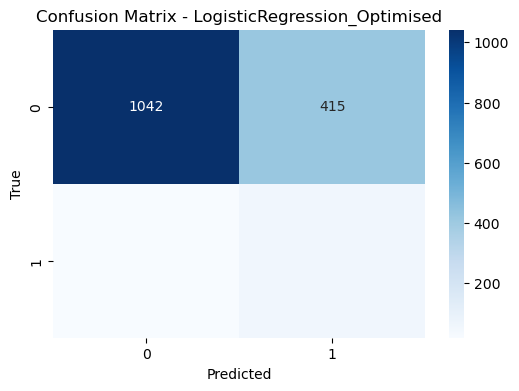

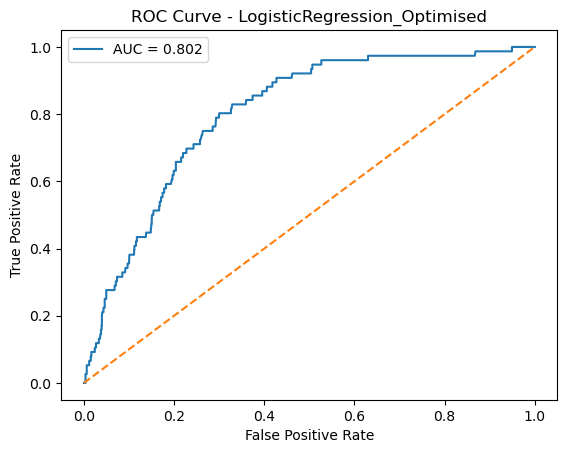

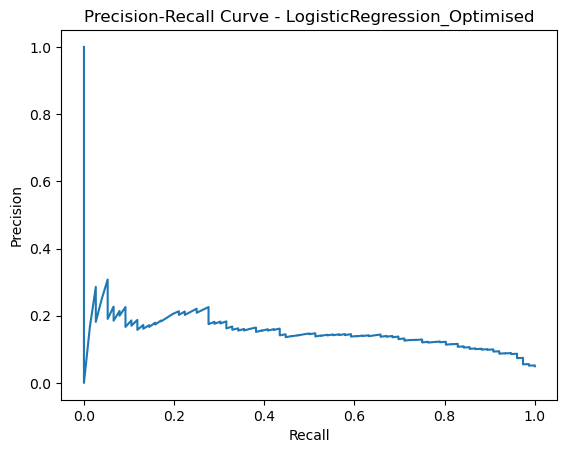

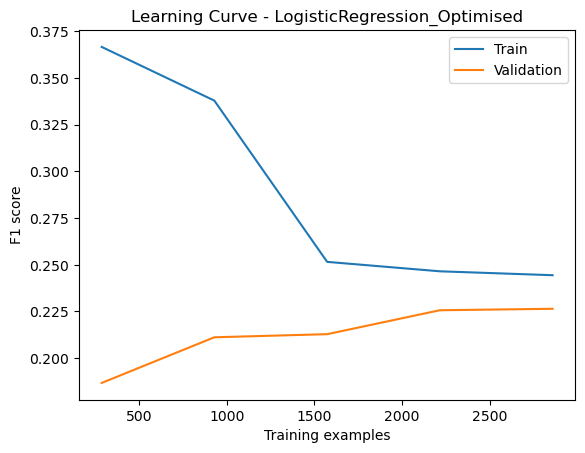

<Figure size 640x480 with 0 Axes>

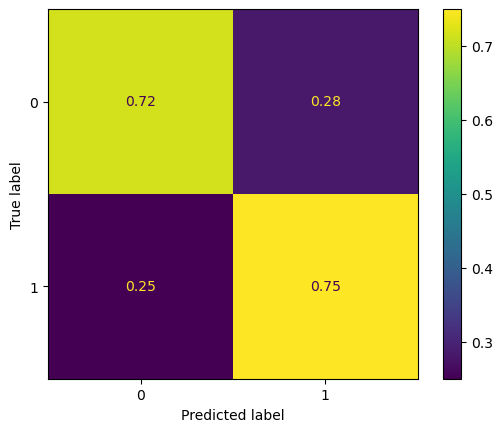

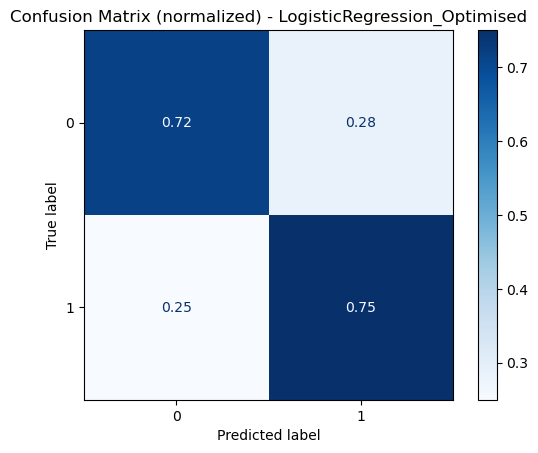

In [70]:
# === Variables ===
numeric_vars = ["age", "avg_glucose_level", "bmi"]
categorical_vars = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease']

# === S√©paration features / target ===
X_train = df_trainset.drop("stroke", axis=1)
y_train = df_trainset["stroke"]
X_test = df_testset.drop("stroke", axis=1)
y_test = df_testset["stroke"]

# === Pr√©traitement ===
numeric_pipeline = Pipeline([
    ("imputer", KNNImputer(n_neighbors=5)),
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numeric_vars),
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_vars)
])

# === Pipeline complet avec preprocessing + mod√®le ===
optimised_model = ImbPipeline([
    ("preprocessing", preprocessor),
    ("resample", SMOTE(random_state=42)),
    ("poly", PolynomialFeatures(degree=2)),
    ("var_filter", VarianceThreshold(threshold=0.0)),
    ("select", SelectKBest(score_func=f_classif, k=30)),
    ("logreg", LogisticRegression(solver="saga", max_iter=500, C=1))
])

# === MLflow logging ===
mlflow.set_experiment("avc_detection_Entrainement_FInal_CLEAN_5")
mlflow.end_run()

name = "LogisticRegression_Optimised"
input_example = X_test[:1].to_dict(orient="records")[0]

with mlflow.start_run(run_name=name):
    optimised_model.fit(X_train, y_train)

    y_pred = optimised_model.predict(X_test)
    y_proba = optimised_model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    loss = log_loss(y_test, y_proba)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    score_f1 = f1_score(y_test, y_pred)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel("Predicted")
    plt.ylabel("True")
    cm_path = f'{name}_cm.png'
    plt.savefig(cm_path)

    mlflow.log_param("model_name", name)
    mlflow.log_metrics({
        "Accuracy": acc,
        "roc_auc": auc,
        "log_loss": loss,
        "Precision": precision,
        "Recall": recall,
        "f1_score": score_f1
    })
    mlflow.log_artifact(cm_path)

    signature = infer_signature(X_test, y_pred)

    mlflow.sklearn.log_model(
        sk_model=optimised_model,
        artifact_path="model",
        input_example=input_example,
        signature=signature
    )

    os.remove(cm_path)

    # Log courbes ROC et PR si tu as une fonction d√©j√† pr√™te
    plot_and_log_curves(optimised_model, X_train, y_train, X_test, y_test, name)

    print(f'‚úÖ Fin du run : {name}')

In [71]:
# Recherche d'une probabilit√© optimale
thresholds = np.linspace(0.05, 0.9, num=10)
resultats = []

for t in thresholds:
    preds = (y_proba >= t).astype(int)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    resultats.append((t, precision, recall, f1))
    
for t, p, r, f in resultats:
    print(f"Seuil: {t:.2f} | Pr√©cision: {p:.3f} | Rappel: {r:.3f} | F1-score: {f:.3f}")

Seuil: 0.05 | Pr√©cision: 0.080 | Rappel: 0.961 | F1-score: 0.148
Seuil: 0.14 | Pr√©cision: 0.091 | Rappel: 0.921 | F1-score: 0.165
Seuil: 0.24 | Pr√©cision: 0.099 | Rappel: 0.895 | F1-score: 0.178
Seuil: 0.33 | Pr√©cision: 0.105 | Rappel: 0.855 | F1-score: 0.187
Seuil: 0.43 | Pr√©cision: 0.116 | Rappel: 0.829 | F1-score: 0.204
Seuil: 0.52 | Pr√©cision: 0.126 | Rappel: 0.750 | F1-score: 0.216
Seuil: 0.62 | Pr√©cision: 0.140 | Rappel: 0.658 | F1-score: 0.230
Seuil: 0.71 | Pr√©cision: 0.151 | Rappel: 0.434 | F1-score: 0.224
Seuil: 0.81 | Pr√©cision: 0.186 | Rappel: 0.276 | F1-score: 0.222
Seuil: 0.90 | Pr√©cision: 0.250 | Rappel: 0.026 | F1-score: 0.048


In [72]:
import mlflow.pyfunc

In [73]:
True_stroke=df_testset[df_testset["stroke"]==1]

In [74]:
True_stroke.iloc[3]

gender                          Male
age                             76.0
hypertension                       1
heart_disease                      0
ever_married                     Yes
work_type              Self-employed
Residence_type                 Rural
avg_glucose_level             194.37
bmi                             27.0
smoking_status       formerly smoked
stroke                             1
Name: 138, dtype: object

In [76]:
# Chargement du mod√®le MLflow
logged_model = 'runs:/d627e37630684f1fb287a7c99ea66808/model'
#loaded_model = mlflow.pyfunc.load_model(logged_model)
loaded_model = mlflow.sklearn.load_model(logged_model)

# Exemple de donn√©es brutes
data = [{
    "gender": "Male",
    "age": 76.0,
    "hypertension": 1,
    "heart_disease": 0,
    "ever_married": "Yes",
    "work_type": "Self-employed",
    "Residence_type": "Rural",
    "avg_glucose_level": 194.37,
    "bmi": 27.0,
    "smoking_status": "formerly smoked"
}]

# Cr√©er un DataFrame √† partir des donn√©es
df_input = pd.DataFrame(data)

# Pr√©diction
prediction = loaded_model.predict(df_input)
print("‚úÖ Pr√©diction (stroke) :", prediction)

# Probabilit√© (si disponible)
try:
    proba = loaded_model.predict_proba(df_input)[:, 1]
    print("üìä Probabilit√© d‚ÄôAVC :", proba)
except Exception:
    print("‚ö†Ô∏è Probabilit√© non disponible pour ce mod√®le")


‚úÖ Pr√©diction (stroke) : [1]
üìä Probabilit√© d‚ÄôAVC : [0.77014918]


## Cr√©er un jeu de test m√©dical r√©aliste

In [77]:
#prediction brute
df_testset["proba"] = loaded_model.predict_proba(df_testset)[:, 1]
df_testset["prediction"] = (df_testset["proba"] >=0.40).astype(int)

In [78]:
faux_negatifs = df_testset[(df_testset["stroke"] == 1) & (df_testset["prediction"] == 0)]
taux_erreur = (len(faux_negatifs)/(len(df_testset[df_testset["stroke"]==1])))*100
print(f"Taux de faux n√©gatifs : {taux_erreur}")


Taux de faux n√©gatifs : 17.105263157894736
